# Basic CNN

In [18]:
import sys
from os.path import abspath

sys.path.append(abspath('../src/'))

import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from utils import *
from baseline_convnet import BaselineConvnet
import matplotlib.pyplot as plt
from sklearn import preprocessing
import random

This is a very simple CNN model trained on the mnist dataset.

In [19]:
x_train, y_train, x_test, y_test, input_shape, num_classes, data_format = preprocess_mnist(test=False)
model = BaselineConvnet(input_shape=input_shape, num_classes=num_classes, data_format=data_format, dataset_name="mnist",test=True)
classifier = model.load_classifier("../trained_models/baseline/mnist_baseline.h5")


Loading mnist.
x_train shape: (60000, 28, 28, 1) 
x_test shape: (10000, 28, 28, 1)

Loading model: ../trained_models/baseline/mnist_baseline.h5


Accuracy on test set.

In [20]:
x_test_pred = model.evaluate_test(classifier, x_test, y_test)


===== Test set evaluation =====

Testing infos:
x_test.shape =  (10000, 28, 28, 1) 
y_test.shape =  (10000, 10) 

Correctly classified: 9911
Incorrectly classified: 89
Test accuracy: 99.11%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Testing the model on adversaries
Now we evaluate this model on adversarial perturbations of the test set 

In [21]:
x_test_fgsm, x_test_fgsm_pred = model.evaluate_adversaries(classifier, x_test, y_test, method="fgsm", dataset_name="mnist",
                                                          adversaries_path='../data/mnist_x_test_fgsm.pkl')


===== Adversarial evaluation =====

Loading adversaries generated with fgsm method on mnist

Adversarial test data.
Correctly classified: 591
Incorrectly classified: 9409
Adversarial accuracy: 5.91%
              precision    recall  f1-score   support

           0       0.16      0.05      0.08       980
           1       0.00      0.00      0.00      1135
           2       0.14      0.16      0.15      1032
           3       0.06      0.08      0.07      1010
           4       0.05      0.02      0.03       982
           5       0.02      0.02      0.02       892
           6       0.17      0.05      0.07       958
           7       0.07      0.01      0.02      1028
           8       0.05      0.20      0.07       974
           9       0.01      0.01      0.01      1009

   micro avg       0.06      0.06      0.06     10000
   macro avg       0.07      0.06      0.05     10000
weighted avg       0.07      0.06      0.05     10000



In [22]:
x_test_projected, x_test_projected_pred = model.evaluate_adversaries(classifier, x_test, y_test, 
                                                                     method='projected_gradient',
                                                                     dataset_name="mnist",
                                        adversaries_path='../data/mnist_x_test_pgd.pkl')


===== Adversarial evaluation =====

Loading adversaries generated with projected_gradient method on mnist

Adversarial test data.
Correctly classified: 71
Incorrectly classified: 9929
Adversarial accuracy: 0.71%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.00      0.00      0.00      1135
           2       0.01      0.01      0.01      1032
           3       0.01      0.01      0.01      1010
           4       0.02      0.02      0.02       982
           5       0.00      0.01      0.01       892
           6       0.03      0.01      0.02       958
           7       0.02      0.01      0.01      1028
           8       0.01      0.01      0.01       974
           9       0.00      0.01      0.00      1009

   micro avg       0.01      0.01      0.01     10000
   macro avg       0.01      0.01      0.01     10000
weighted avg       0.01      0.01      0.01     10000



In [23]:
x_test_deepfool, x_test_deepfool_pred = model.evaluate_adversaries(classifier, x_test, y_test, method='deepfool',
                                                                   dataset_name="mnist",
                                        adversaries_path='../data/mnist_x_test_deepfool.pkl')


===== Adversarial evaluation =====

Loading adversaries generated with deepfool method on mnist

Adversarial test data.
Correctly classified: 5430
Incorrectly classified: 4570
Adversarial accuracy: 54.30%
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       980
           1       0.82      0.66      0.73      1135
           2       0.52      0.58      0.55      1032
           3       0.42      0.55      0.48      1010
           4       0.49      0.63      0.55       982
           5       0.46      0.47      0.47       892
           6       0.74      0.40      0.52       958
           7       0.60      0.57      0.59      1028
           8       0.60      0.50      0.54       974
           9       0.37      0.42      0.39      1009

   micro avg       0.54      0.54      0.54     10000
   macro avg       0.56      0.54      0.54     10000
weighted avg       0.57      0.54      0.55     10000



In [24]:
x_test_carlini, x_test_carlini_pred = model.evaluate_adversaries(classifier, x_test, y_test, 
                                                                     method='carlini_linf',
                                                                     dataset_name="mnist",
                                        adversaries_path='../data/mnist_x_test_carlini_linf.pkl')


===== Adversarial evaluation =====

Loading adversaries generated with carlini_linf method on mnist

Adversarial test data.
Correctly classified: 2896
Incorrectly classified: 7104
Adversarial accuracy: 28.96%
              precision    recall  f1-score   support

           0       0.51      0.40      0.45       980
           1       0.76      0.63      0.69      1135
           2       0.20      0.21      0.20      1032
           3       0.24      0.30      0.27      1010
           4       0.27      0.30      0.29       982
           5       0.20      0.30      0.24       892
           6       0.52      0.33      0.41       958
           7       0.43      0.29      0.35      1028
           8       0.06      0.05      0.05       974
           9       0.03      0.04      0.03      1009

   micro avg       0.29      0.29      0.29     10000
   macro avg       0.32      0.29      0.30     10000
weighted avg       0.33      0.29      0.30     10000



## A look at the adversaries

Here are some examples of correct predictions on the test set and wrong predictions on the adversarially generated test set

In [25]:
# one hot decoding of the labels
y_test_numeric = np.argmax(y_test, axis=1)

# idxs for correct predictions on test set, wrong on adversarial test set
#idxs = np.where((y_test_numeric == x_test_pred) & (y_test_numeric != x_test_adv_pred))[0]
x_test_pred = np.argmax(model.predict(classifier, x_test), axis=1)
x_test_adv_pred = np.argmax(model.predict(classifier, x_test_fgsm), axis=1)
idxs = np.where((y_test_numeric == x_test_pred) & (y_test_numeric != x_test_adv_pred))[0]

# reshape image arrays
im_test = [im.reshape(28, 28) for im in x_test]
im_test_fgsm = [im.reshape(28, 28) for im in x_test_fgsm]
im_test_deepfool = [im.reshape(28, 28) for im in x_test_deepfool]
im_test_projected = [im.reshape(28, 28) for im in x_test_projected]
im_test_carlini = [im.reshape(28, 28) for im in x_test_carlini]

# randomly sample n images
random.seed(111)
n = 5 
plot_idxs = np.random.choice(idxs, n)

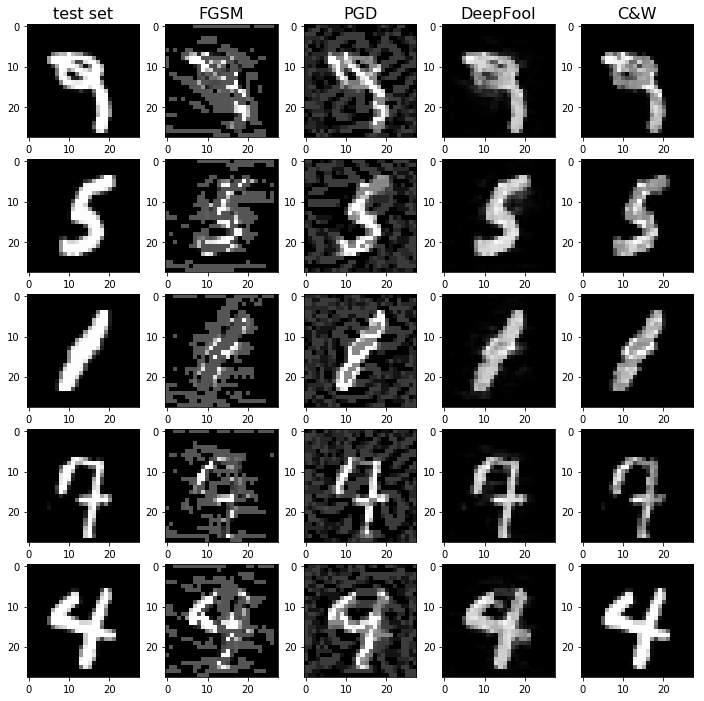

In [26]:
f, ax = plt.subplots(n, 5, figsize=(12,12))
for i,idx in enumerate(plot_idxs):
    ax[i,0].imshow(im_test[idx], cmap='gray')
    ax[i,1].imshow(im_test_fgsm[idx], cmap='gray')
    ax[i,3].imshow(im_test_deepfool[idx], cmap='gray')
    ax[i,2].imshow(im_test_projected[idx], cmap='gray')
    ax[i,4].imshow(im_test_carlini[idx], cmap='gray')
fontsize=16
ax[0,0].set_title("test set", fontsize=fontsize)
ax[0,1].set_title("FGSM", fontsize=fontsize)
ax[0,3].set_title("DeepFool", fontsize=fontsize)
ax[0,2].set_title("PGD", fontsize=fontsize)
ax[0,4].set_title("C&W", fontsize=fontsize)
plt.show()

## CIFAR10

In [27]:
dataset = "cifar"
x_train, y_train, x_test, y_test, input_shape, num_classes, data_format = load_cifar(test=True)
model = BaselineConvnet(input_shape=input_shape, num_classes=num_classes, data_format=data_format, dataset_name=dataset, test=True)
classifier = model.load_classifier("../trained_models/baseline/cifar_baseline.h5")

x_test_fgsm, x_test_fgsm_pred = model.evaluate_adversaries(classifier, x_test, y_test, method="fgsm", dataset_name=dataset,
                                                          adversaries_path='../data/cifar_x_test_fgsm.pkl', test=True)
x_test_pgd, x_test_pgd_pred = model.evaluate_adversaries(classifier, x_test, y_test, method="pgd", dataset_name=dataset,
                                                          adversaries_path='../data/cifar_x_test_pgd.pkl', test=True)
x_test_deepfool, x_test_fgsm_deepfool = model.evaluate_adversaries(classifier, x_test, y_test, method="deepfool", dataset_name=dataset,
                                                          adversaries_path='../data/cifar_x_test_deepfool.pkl',test=True)
x_test_carlini, x_test_carlini_pred = model.evaluate_adversaries(classifier, x_test, y_test, method="carlini", dataset_name=dataset,
                                                          adversaries_path='../data/cifar_x_test_carlini_linf.pkl',test=True)



Loading model: ../trained_models/baseline/cifar_baseline.h5

===== Adversarial evaluation =====

Loading adversaries generated with fgsm method on cifar

Adversarial test data.
Correctly classified: 15
Incorrectly classified: 85
Adversarial accuracy: 15.00%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00         6
           2       0.06      0.12      0.08         8
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         8
           6       0.18      0.81      0.29        16
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00        13
           9       0.25      0.09      0.13        11

   micro avg       0.15      0.15      0.15       100
   macro avg       0.05      0.10      0.05       100
weighted avg       0.06      0.15    

In [28]:
# one hot decoding of the labels
y_test_numeric = np.argmax(y_test, axis=1)

# idxs for correct predictions on test set, wrong on adversarial test set
x_test_pred = np.argmax(model.predict(classifier, x_test), axis=1)
x_test_adv_pred = np.argmax(model.predict(classifier, x_test_fgsm), axis=1)
idxs = np.where((y_test_numeric == x_test_pred) & (y_test_numeric != x_test_adv_pred))[0]

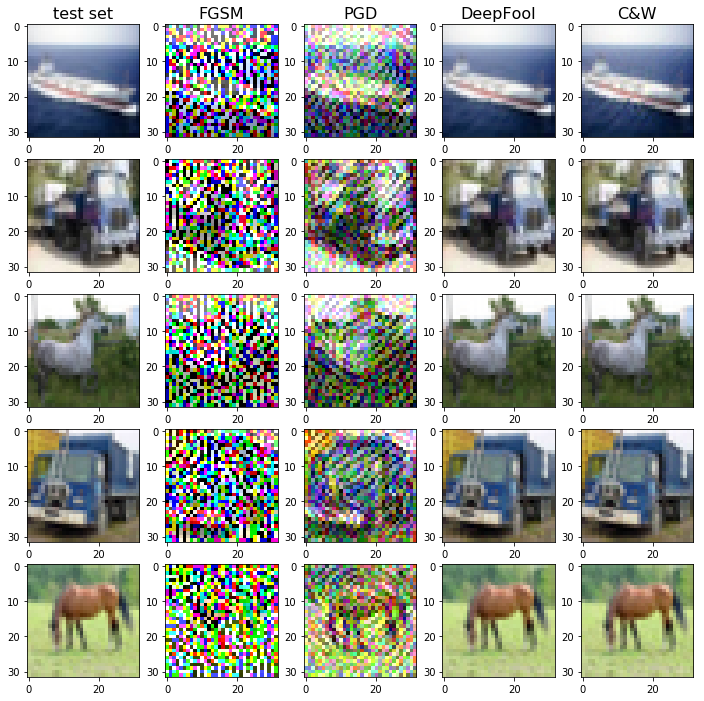

In [30]:
# reshape image arrays
shape=32
im_test = [im.reshape(shape, shape, 3) for im in x_test]
im_test_fgsm = [im.reshape(shape, shape, 3) for im in x_test_fgsm]
im_test_deepfool = [im.reshape(shape, shape, 3) for im in x_test_deepfool]
im_test_projected = [im.reshape(shape, shape, 3) for im in x_test_pgd]
im_test_carlini = [im.reshape(shape, shape, 3) for im in x_test_carlini]

# randomly sample n images
random.seed(111)
n = 5 
plot_idxs = np.random.choice(idxs, n)
f, ax = plt.subplots(n, 5, figsize=(12,12))
for i,idx in enumerate(plot_idxs):
    ax[i,0].imshow(im_test[idx])
    ax[i,1].imshow(im_test_fgsm[idx])
    ax[i,3].imshow(im_test_deepfool[idx])
    ax[i,2].imshow(im_test_projected[idx])
    ax[i,4].imshow(im_test_carlini[idx])
fontsize=16
ax[0,0].set_title("test set", fontsize=fontsize)
ax[0,1].set_title("FGSM", fontsize=fontsize)
ax[0,3].set_title("DeepFool", fontsize=fontsize)
ax[0,2].set_title("PGD", fontsize=fontsize)
ax[0,4].set_title("C&W", fontsize=fontsize)
plt.show()

## FGSM Adversarial training
First adversarial training is performed on the initial model, using FGSM perturbations of the training set. Then the robust resulting model is evaluated on different test attacks, as in the above examples.

In [13]:
x_train, y_train, x_test, y_test, input_shape, num_classes = preprocess_mnist()
model = BaselineConvnet(input_shape=input_shape, num_classes=num_classes)
robust_classifier = model.load_classifier("IBM-art/mnist_cnn_robust.h5")


Loading mnist.
x_train shape: (60000, 28, 28, 1) 
x_test shape: (10000, 28, 28, 1)


In [14]:
x_test_fgsm, x_test_fgsm_pred = model.evaluate_adversaries(robust_classifier, x_test, y_test, method='fgsm')


Adversarial evaluation using fgsm method.

Adversarial test data.
Correctly classified: 8145
Incorrectly classified: 1855
Adversarial accuracy: 81.45%


In [15]:
x_test_deepfool, x_test_deepfool_pred = model.evaluate_adversaries(robust_classifier, x_test, y_test, 
                                                                     method='deepfool',
                                                                     adversaries_path='../data/mnist_x_test_deepfool.pkl')


Adversarial evaluation using deepfool method.

Adversarial test data.
Correctly classified: 9746
Incorrectly classified: 254
Adversarial accuracy: 97.46%


In [16]:
x_test_projected, x_test_projected_pred = model.evaluate_adversaries(robust_classifier, x_test, y_test, method='projected_gradient',
                                        adversaries_path='../data/mnist_x_test_projected_gradient.pkl')


Adversarial evaluation using projected_gradient method.

Adversarial test data.
Correctly classified: 2592
Incorrectly classified: 7408
Adversarial accuracy: 25.92%
